In [175]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

from keras.models import Sequential
from keras.layers import Lambda, Flatten, Dense, Dropout
from keras.optimizers import Adam, RMSprop
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator

from sklearn.model_selection import train_test_split

In [176]:
#train = pd.read_csv('train.csv')
#test = pd.read_csv('test.csv')
#raw_train = train.copy()
#raw_test = test.copy()
x_train = raw_train.drop('label',axis=1)
y_train = raw_train['label']
test = raw_test

In [177]:
x_train = train.drop('label',axis=1).values.astype('float32')
y_train = train['label'].values.astype('int32')
test = test.values.astype('float32')

In [178]:
x_train = x_train.reshape((-1,28,28,1))

In [179]:
test = test.reshape((-1,28,28,1))

In [180]:
px_mean = x_train.mean()
px_std = x_train.std()

def Standardization(x):
    return (x-px_mean) / px_std

In [181]:
from keras.utils.np_utils import to_categorical
y_train = to_categorical(y_train)

In [182]:
y_train.shape

(42000, 10)

In [183]:
np.random.seed(43)

In [184]:
from keras.models import Sequential
from keras.layers import Lambda, Flatten, Dense, Dropout, BatchNormalization, Convolution2D, MaxPooling2D
from keras.callbacks import EarlyStopping

In [185]:
model = Sequential()
model.add(Lambda(Standardization,input_shape=(28,28,1)))
model.add(Flatten())
model.add(Dense(10,activation='softmax'))
model.input_shape, model.output_shape

((None, 28, 28, 1), (None, 10))

In [186]:
model.compile(optimizer=RMSprop(),loss='categorical_crossentropy',metrics=['accuracy'])

In [188]:
generator = ImageDataGenerator()

In [189]:
x = x_train
y = y_train
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.10, random_state=42)
batches = generator.flow(x_train, y_train, batch_size=64)
val_batches=generator.flow(x_val, y_val, batch_size=64)

In [150]:
history=model.fit_generator(generator=batches,
                            steps_per_epoch=batches.n // 64,
                            epochs=3, 
                            validation_data=val_batches, 
                            validation_steps=val_batches.n // 64)

Epoch 1/3
590/590 [==============================] - 2s 3ms/step - loss: 0.2595 - accuracy: 0.9279 - val_loss: 0.3011 - val_accuracy: 0.9149
Epoch 2/3
590/590 [==============================] - 1s 2ms/step - loss: 0.2569 - accuracy: 0.9287 - val_loss: 0.3021 - val_accuracy: 0.9135
Epoch 3/3
590/590 [==============================] - 2s 3ms/step - loss: 0.2550 - accuracy: 0.9291 - val_loss: 0.2965 - val_accuracy: 0.9178


In [151]:
history_dict = history.history

In [152]:
history_dict

{'loss': [0.25949588418006897, 0.256940633058548, 0.2549961507320404],
 'accuracy': [0.9278672933578491, 0.9286623001098633, 0.9291127920150757],
 'val_loss': [0.3011103868484497, 0.30207768082618713, 0.2964656949043274],
 'val_accuracy': [0.9149038195610046, 0.9134615659713745, 0.9177884459495544]}

Text(0, 0.5, 'Accuracy')

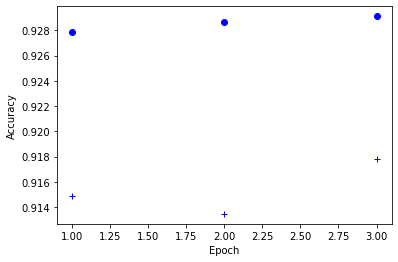

In [153]:
plt.plot(range(1,4),history_dict['accuracy'],'bo')
plt.plot(range(1,4),history_dict['val_accuracy'],'b+')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

In [154]:
def get_fullyConnected_model():
    model = Sequential([
        Lambda(Standardization,input_shape=(28,28,1)),
        Flatten(),
        Dense(512,activation='relu'),
        Dense(10,activation='softmax'),
    ])
    model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
    return model

In [155]:
fc_model = get_fullyConnected_model()
fc_model.optimizer.lr = 0.01

In [156]:
history = fc_model.fit_generator(generator=batches,
                                steps_per_epoch=batches.n // batches.batch_size,
                                epochs=3,
                                validation_data=val_batches,
                                validation_steps=val_batches.n // val_batches.batch_size)

Epoch 1/3
590/590 [==============================] - 4s 6ms/step - loss: 0.8919 - accuracy: 0.8508 - val_loss: 0.2768 - val_accuracy: 0.9214
Epoch 2/3
590/590 [==============================] - 3s 5ms/step - loss: 0.2007 - accuracy: 0.9428 - val_loss: 0.2608 - val_accuracy: 0.9325
Epoch 3/3
590/590 [==============================] - 3s 5ms/step - loss: 0.1714 - accuracy: 0.9536 - val_loss: 0.2397 - val_accuracy: 0.9397


In [157]:
def get_CNN_model():
    model = Sequential([
        Lambda(Standardization,input_shape=(28,28,1)),
        Convolution2D(32,(3,3),activation='relu'),
        Convolution2D(32,(3,3),activation='relu'),
        MaxPooling2D(),
        Convolution2D(64,(3,3),activation='relu'),
        Convolution2D(64,(3,3),activation='relu'),
        MaxPooling2D(),
        Flatten(),
        Dense(512,activation='relu'),
        Dense(10,activation='softmax')
    ])
    
    model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
    return model

In [158]:
CNN_model = get_CNN_model()
CNN_model.optimizer.lr=0.01

In [160]:
history = CNN_model.fit_generator(generator=batches,
                                 #steps_per_epoch=
                                 epochs=1,
                                 validation_data=val_batches)

591/591 [==============================] - 58s 99ms/step - loss: 0.1066 - accuracy: 0.9676 - val_loss: 0.1092 - val_accuracy: 0.9676


In [161]:
generator2 =ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3,
                               height_shift_range=0.08, zoom_range=0.08)
batches2 = generator2.flow(x_train, y_train, batch_size=64)
val_batches2 = generator2.flow(x_val, y_val, batch_size=64)

In [164]:
CNN_model.optimizer.lr = 0.001
history = CNN_model.fit_generator(generator=batches2,
                                 validation_data=val_batches2,
                                 epochs=1)

C:\Users\admin\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


591/591 [==============================] - 61s 104ms/step - loss: 0.1679 - accuracy: 0.9472 - val_loss: 0.1326 - val_accuracy: 0.9590


In [165]:
from keras.layers.normalization import BatchNormalization

In [190]:
def get_bn_model():
    model = Sequential([
        Lambda(Standardization, input_shape=(28,28,1)),
        Convolution2D(32,(3,3), activation='relu'),
        BatchNormalization(axis=1),
        Convolution2D(32,(3,3), activation='relu'),
        MaxPooling2D(),
        BatchNormalization(axis=1),
        Convolution2D(64,(3,3), activation='relu'),
        BatchNormalization(axis=1),
        Convolution2D(64,(3,3), activation='relu'),
        MaxPooling2D(),
        Flatten(),
        BatchNormalization(),
        Dense(512, activation='relu'),
        BatchNormalization(),
        Dense(10, activation='softmax')
    ])
    
    model.compile(optimizer='Adam',loss='categorical_crossentropy',
                 metrics=['accuracy'])
    return model

In [197]:
bn_model = get_bn_model()
bn_model.optimizer.lr = 0.01
#history = bn_model.fit_generator(generator=batches2,
#                                validation_data=val_batches2)

In [198]:
gen = ImageDataGenerator()
batches = gen.flow(x,y,batch_size=64)
history = bn_model.fit_generator(generator=batches,
                                epochs=40)

C:\Users\admin\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/40
657/657 [==============================] - 123s 185ms/step - loss: 0.2924 - accuracy: 0.9229
Epoch 2/40
657/657 [==============================] - 123s 187ms/step - loss: 0.0578 - accuracy: 0.9826
Epoch 3/40
657/657 [==============================] - 112s 170ms/step - loss: 0.0468 - accuracy: 0.9857
Epoch 4/40
657/657 [==============================] - 113s 171ms/step - loss: 0.0377 - accuracy: 0.9888
Epoch 5/40
657/657 [==============================] - 111s 169ms/step - loss: 0.0408 - accuracy: 0.9882
Epoch 6/40
657/657 [==============================] - 114s 173ms/step - loss: 0.0321 - accuracy: 0.9902
Epoch 7/40
657/657 [==============================] - 112s 171ms/step - loss: 0.0355 - accuracy: 0.9892
Epoch 8/40
657/657 [==============================] - 114s 173ms/step - loss: 0.0323 - accuracy: 0.9904
Epoch 9/40
657/657 [==============================] - 112s 170ms/step - loss: 0.0209 - accuracy: 0.9931
Epoch 10/40
657/657 [==============================] - 115s 175m

In [199]:
submission = pd.read_csv('sample_submission.csv')
submission.iloc[:,1] = bn_model.predict_classes(test)
submission

C:\Users\admin\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


In [200]:
submission.to_csv('submission_epoch40.csv',index=False)